# 勾配降下法, 確率的勾配降下法をスクラッチで

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## ダミーデータの準備

In [2]:
np.random.seed(100)
data_size = 1000
X = np.random.randn(data_size)
Y = 2 * X + 3 + np.random.randn(data_size)*3

Text(0,0.5,'y')

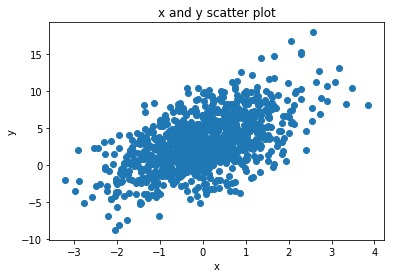

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X, Y)
ax.set_title(u"x and y scatter plot")
ax.set_xlabel("x")
ax.set_ylabel("y")

## 1. 勾配降下法

In [4]:
def f(alpha, beta, x):
    return beta * x + alpha

def alpha_deriv(alpha, beta, x, y):
    return np.sum(-2.0 * (y - f(alpha, beta, x)))

def beta_deriv(alpha, beta, x, y):
    return np.sum(-2.0 * x * (y - f(alpha, beta, x)))

def E(alpha, beta, x, y):
    return np.sum((y- f(alpha, beta, x)) ** 2)

In [5]:
def gd(learning_rate, max_iteration):
    e = 0.0001
    cost_history = []
    alpha_history = []
    beta_history = []
    current_alpha, current_beta = np.random.randn(2)

    for _ in range(max_iteration):
        cost_history.append(E(current_alpha, current_beta, X, Y))
        alpha_history.append(current_alpha)
        beta_history.append(current_beta)
        next_alpha = current_alpha - learning_rate * alpha_deriv(current_alpha, current_beta , X, Y)
        next_beta = current_beta - learning_rate * beta_deriv(current_alpha, current_beta , X, Y)

        if abs(current_alpha - next_alpha) < e and abs(current_beta - next_beta) < e:
            break
            
        current_alpha, current_beta = next_alpha, next_beta
        
    return cost_history, alpha_history, beta_history

In [6]:
def disp_result(cost_history, alpha_history,  beta_history ):
    fixed_alpha = alpha_history[np.argmin(cost_history)] # alpha_history[-1]
    fixed_beta = beta_history[np.argmin(cost_history)] # beta_history[-1]
    print("alpha:", fixed_alpha)
    print("beta:", fixed_beta)
    fig = plt.figure(figsize=(12,14))

    ax = fig.add_subplot(3, 2, 1)
    plt.plot(alpha_history)
    ax.set_title("alpha")
    ax = fig.add_subplot(3, 2, 2)
    plt.plot(beta_history)
    ax.set_title("beta")

    ax = fig.add_subplot(3, 2, 3)
    plt.plot(cost_history)
    ax.set_title("cost")

    ax = fig.add_subplot(3, 2, 5)
    ax.scatter(X, Y)
    ax.plot(X, f(fixed_alpha, fixed_beta, X), color="red")
    ax.set_title("regression")

alpha: 3.0258259366072044
beta: 1.9864395331832765


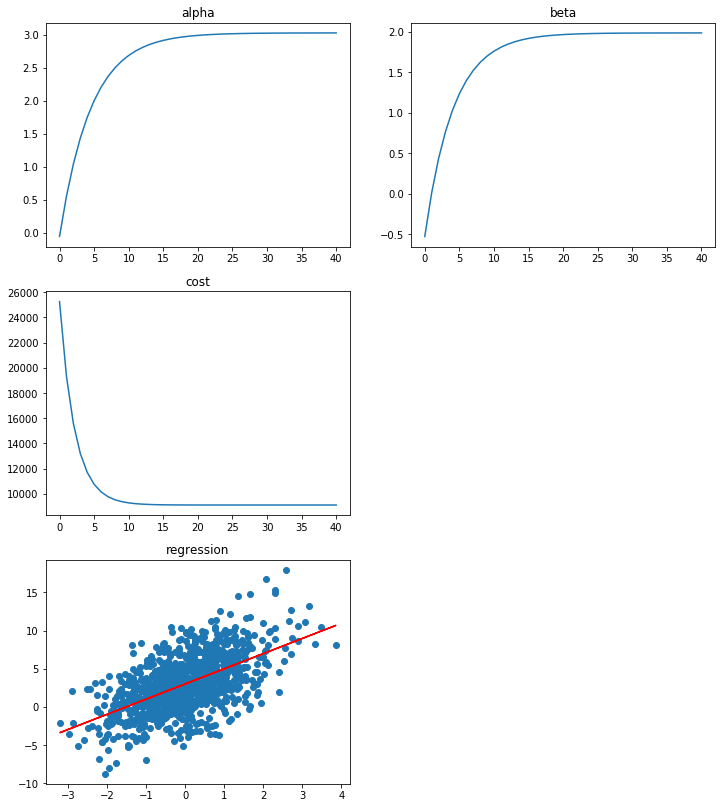

In [7]:
cost_history, alpha_history,  beta_history = gd(0.0001, 50)
disp_result(cost_history, alpha_history,  beta_history)

## 2. 確率的勾配降下法

In [8]:
# 学習率が一定だと極小値にたどり着かないことが多いので、
#学習率をエポック毎に小さくしてくことにした
def new_learning_rate(learning_rate, t):
    return learning_rate / t

def sgd(learning_rate, max_epoch):
    e = 0.0001
    cost_history = []
    alpha_history = []
    beta_history = []
    current_alpha, current_beta = np.random.randn(2)
    idxs = np.arange(X.shape[0])

    counter = 1
    for t in range(max_epoch):
        np.random.shuffle(idxs)
        learning_rate = new_learning_rate(learning_rate, t+1)

        for idx in idxs:
            x, y = X[idx], Y[idx]
            cost_history.append(E(current_alpha, current_beta, X, Y))
            alpha_history.append(current_alpha)
            beta_history.append(current_beta)
            next_alpha = current_alpha - learning_rate * alpha_deriv(current_alpha, current_beta , x, y)
            next_beta = current_beta - learning_rate * beta_deriv(current_alpha, current_beta , x, y)

            if abs(current_alpha - next_alpha) < e and abs(current_beta - next_beta) < e:
                break

            current_alpha, current_beta = next_alpha, next_beta
            counter += 1
        
    return cost_history, alpha_history, beta_history

alpha: 3.069296621761816
beta: 2.0469425446243488


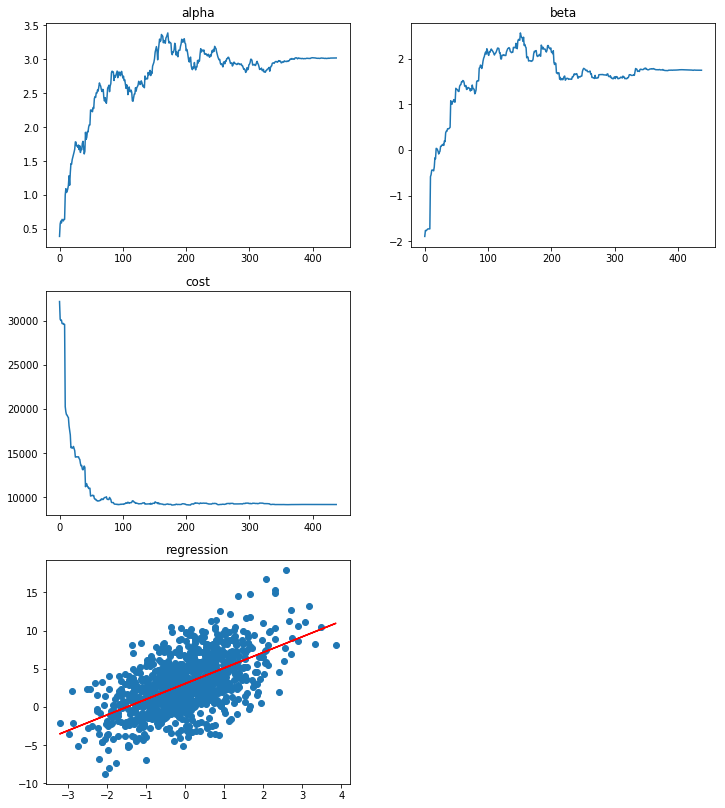

In [9]:
cost_history, alpha_history,  beta_history = sgd(0.01, 5)
disp_result(cost_history, alpha_history,  beta_history)